<a href="https://colab.research.google.com/github/basanab/mu_e_scatt/blob/main/ML_modl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from scipy.optimize import curve_fit 


In [41]:
df=pd.read_csv("/content/newmu_table.csv", sep="\t")
df

,E_mu,Theta_e,Theta_mu,Emu_p,Ee_p
0,0.5,0.000,0.213165,0.479139,0.021371
1,0.5,0.001,0.213165,0.479139,0.021371
2,0.5,0.002,0.213165,0.479141,0.021369
3,0.5,0.003,0.213165,0.479143,0.021367
4,0.5,0.004,0.213165,0.479146,0.021364
...,...,...,...,...,...
99995,1000.0,0.045,0.000108,999.496246,0.504264
99996,1000.0,0.046,0.000108,999.517929,0.482581
99997,1000.0,0.047,0.000108,999.538244,0.462266
99998,1000.0,0.048,0.000108,999.557302,0.443208


In [39]:
# df=pd.read_excel("/content/drive/MyDrive/ColabNotebooks/muon_data.xlsx")
# df

In [42]:
# Create a copy for further processing
dataset = df.copy()
# Check for null values
dataset.isna().sum()

E_mu        0
Theta_e     0
Theta_mu    0
Emu_p       0
Ee_p        0
dtype: int64

In [43]:
# Split the Dataset and create train and test sets
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

print(dataset.shape, train_dataset.shape, test_dataset.shape)
train_dataset.describe().transpose()

(100000, 5) (80000, 5) (20000, 5)


,count,mean,std,min,25%,50%,75%,max
E_mu,80000.0,500.062487,288.479844,0.500000,250.500000,500.000000,749.500000,1000.000000
Theta_e,80000.0,0.024507,0.014416,0.000000,0.012000,0.024000,0.037000,0.049000
Theta_mu,80000.0,0.001022,0.006104,0.000106,0.000165,0.000269,0.000589,0.213175
Emu_p,80000.0,474.746827,293.400281,0.479139,218.261402,469.503675,727.860709,999.575207
Ee_p,80000.0,25.316171,94.062318,0.020350,0.744670,1.631640,6.895360,989.170890


In [44]:
# Remove columns not needed
dataset_size2=dataset.drop(['E_mu', 'Emu_p','Ee_p'], axis=1)
dataset_size2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Theta_e,100000.0,0.02450,0.014431,0.000000,0.012000,0.024500,0.037000,0.049000
Theta_mu,100000.0,0.00102,0.006065,0.000106,0.000165,0.000269,0.000591,0.213175


In [45]:
# Separate labels and features
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop("E_mu")
test_labels = test_features.pop("E_mu")

In [46]:
print(train_features)
print(test_features)
print(train_labels)
print(test_labels)

       Theta_e  Theta_mu       Emu_p      Ee_p
3582     0.032  0.003067   35.037446  0.963064
60498    0.048  0.000178  604.557434  0.443076
53227    0.027  0.000211  531.102516  1.397994
21333    0.033  0.000516  212.566520  0.933990
3885     0.035  0.002812   38.188633  0.811877
...        ...       ...         ...       ...
27389    0.039  0.000398  273.330462  0.670048
8871     0.021  0.001308   86.749052  2.251458
47812    0.012  0.000284  471.509520  6.990990
4539     0.039  0.002394   44.840837  0.659673
51018    0.018  0.000235  507.366140  3.134370

[80000 rows x 4 columns]
       Theta_e  Theta_mu       Emu_p      Ee_p
2        0.002  0.213165    0.479141  0.021369
10       0.010  0.213165    0.479183  0.021327
13       0.013  0.213165    0.479214  0.021296
20       0.020  0.213167    0.479316  0.021194
21       0.021  0.213167    0.479334  0.021176
...        ...       ...         ...       ...
99966    0.016  0.000124  996.024539  3.975971
99971    0.021  0.000116  997.6886

In [47]:
#normalisation
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
label_scaler = StandardScaler()
# Fit on Training Data
feature_scaler.fit(train_features.values)
label_scaler.fit(train_labels.values.reshape(-1, 1))

StandardScaler()

In [48]:
# Transform both training and testing data
train_features = feature_scaler.transform(train_features.values)
test_features = feature_scaler.transform(test_features.values)
train_labels = label_scaler.transform(train_labels.values.reshape(-1, 1))
test_labels = label_scaler.transform(test_labels.values.reshape(-1, 1))

In [49]:
# Now let's create a Deep Neural Network to train a regression model on our data.
model = Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])


In [50]:
tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name='Adam',
    
)


In [51]:
model.compile(optimizer="Adam",
               loss="mean_squared_error")

In [52]:
# Now let's train the model
history = model.fit(epochs=100, x=train_features, y=train_labels,
          validation_data=(test_features, test_labels), verbose=0)

In [53]:
# Function to plot loss
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0,10])
    plt.xlabel('Epoch')
    plt.ylabel('Error (Loss)')
    plt.legend()
    plt.grid(True)

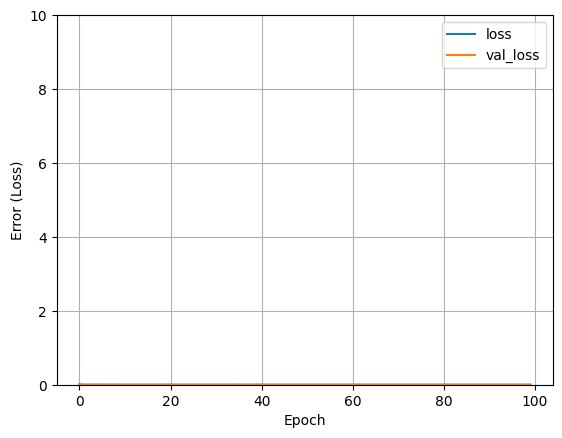

In [54]:
plot_loss(history)

In [55]:
# Model evaluation on testing dataset
model.evaluate(test_features, test_labels)

625/625 [==============================] - 1s 1ms/step - loss: 3.7289e-08


3.728895237031793e-08

In [ ]:
#Save model 
model.save("correct_ML_mdl.h5")

In [56]:
# Load and perform predictions
results = model.predict(test_features)

625/625 [==============================] - 1s 1ms/step


In [57]:
# We can decode using the scikit-learn object to get the result
decoded_result = label_scaler.inverse_transform(results.reshape(-1,1))
print(decoded_result)
print(decoded_result.shape)
decoded_testlabels =label_scaler.inverse_transform(test_labels)

[[4.9248019e-01]
 [4.9540988e-01]
 [4.9653903e-01]
 ...
 [9.9995166e+02]
 [9.9995514e+02]
 [9.9995605e+02]]
(20000, 1)


Text(0, 0.5, 'Predicted Energy (GeV)')

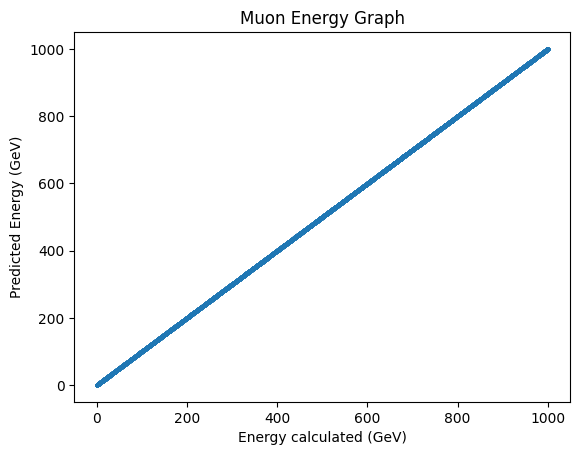

In [58]:
plt.scatter(decoded_testlabels, decoded_result, s=3)
plt.title("Muon Energy Graph")
plt.xlabel("Energy calculated (GeV)")
plt.ylabel("Predicted Energy (GeV)")

In [59]:
def gauss(x,amp,mu,sigma):
    return (amp/np.sqrt(sigma))*np.exp(-(x-mu)**2 / 2*sigma**2)

In [60]:
diff= decoded_result- decoded_testlabels
# plt.hist(diff,bins= 500)

This is n==> [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00
 1.000e+00 1.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+00 0.000e+00
 0.000e+00 0.000e+00 2.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 0.000e+00 1.000e+00 1.000e+00 0.000e+00 0.0

<ipython-input-59-679ff3a10ba0>:2: RuntimeWarning: invalid value encountered in sqrt
  return (amp/np.sqrt(sigma))*np.exp(-(x-mu)**2 / 2*sigma**2)


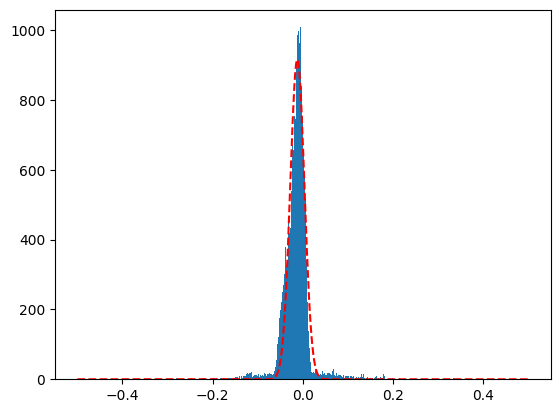

In [61]:
x= np.linspace(-0.5,0.5,500)
n,bins,patches = plt.hist(diff,bins= 500,range= (-0.5,0.5))#, ); # range= (-0.5,1.5)
print("This is n==>",n, bins, patches)
y=n 
print(max(y))
popt, pcov = curve_fit(gauss, x,y)#p0= (300,0.0,0.5)) # p0= (amp, mean, satndard deviation)===> guessed
y= gauss(x, popt[0], popt[1], popt[2])
plt.plot(x,y,color= 'r', linestyle='dashed', label='fit function');
print(popt[0],popt[1],popt[2]) # gives actual (amp, mean, standard deviation)
# plt.show()